In [ ]:
# Imported all the necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

# Set the default style for seaborn
sns.set()

In [ ]:
# Load the Iris dataset from a iris.csv file
df = pd.read_csv('/content/iris.csv')

# Print information about the dataset
print(df.info())

# Counts and print the number of samples for each class in the 'species' column
total_class = df['species'].value_counts()
print(f'\nNumber of semples for each class:')
print(total_class)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Number of semples for each class:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


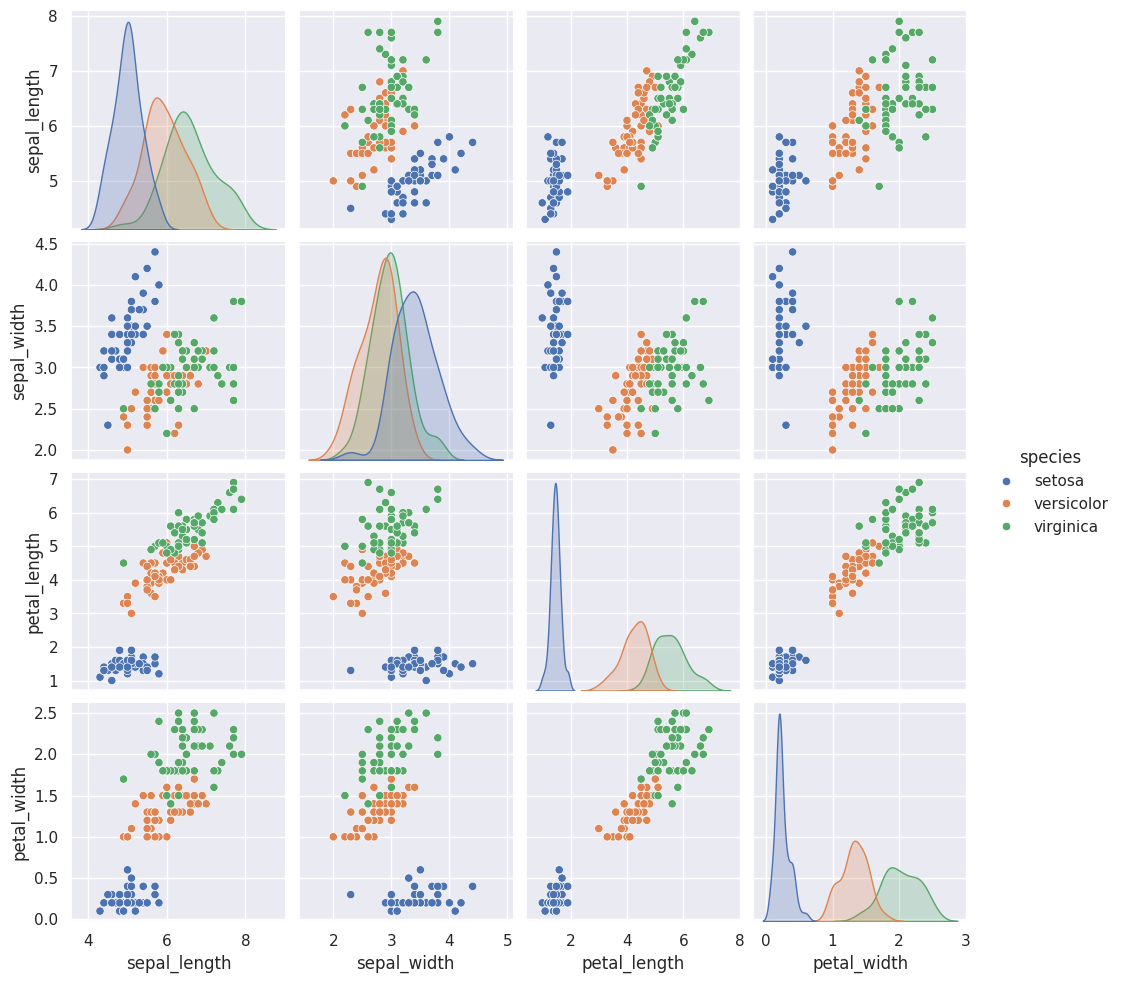

In [ ]:
# Visulize dataset with pair plots for different classes based on the features
sns.pairplot(df, hue ='species')

In [ ]:
# Extracting and printing descriptive statistics for the 'setosa' class
class_setosa = df[df['species'] == "setosa"]
print(f'\nStatistics for class setosa:\n',class_setosa.describe())

# Extracting and printing descriptive statistics for the 'versicolor' class
class_versicolor = df[df['species'] == "versicolor"]
print(f'\nStatistics for class versicolor:\n',class_versicolor.describe())

# Extracting and printing descriptive statistics for the 'virginica' class
class_virginica = df[df['species'] == "virginica"]
print(f'\nStatistics for class virginica:\n',class_virginica.describe())


Statistics for class setosa:
        sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Statistics for class versicolor:
        sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000  

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training (X_train, X_test) and testing (y_train, y_test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

**1) RandomForest Classification**


Evaluation metrics:

Accuracy Score: 1.0

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



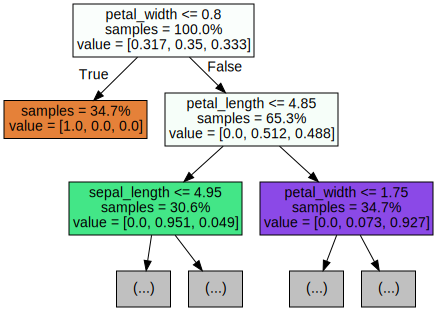

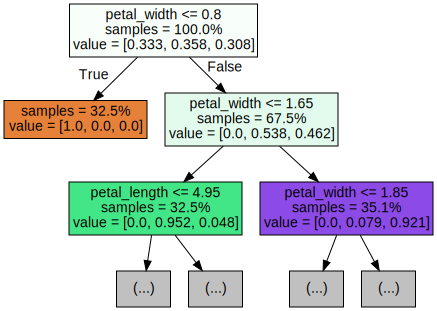

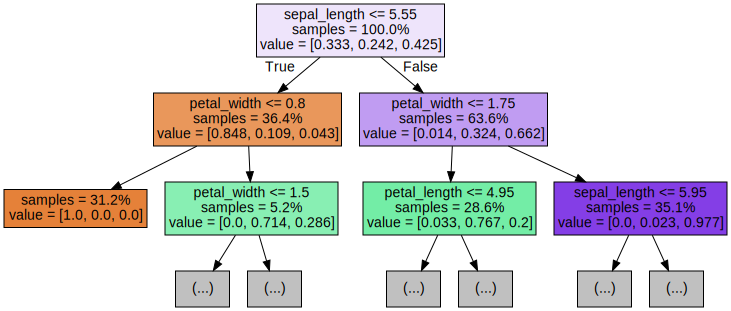

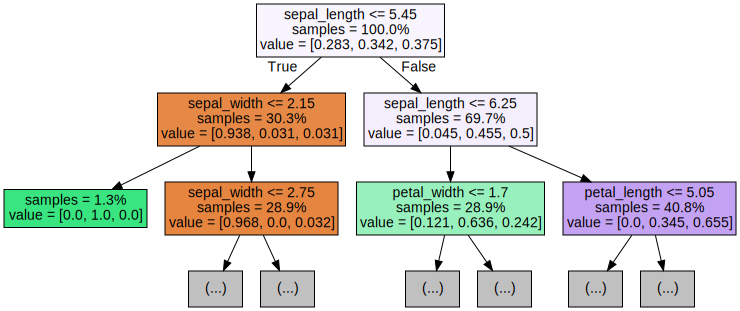

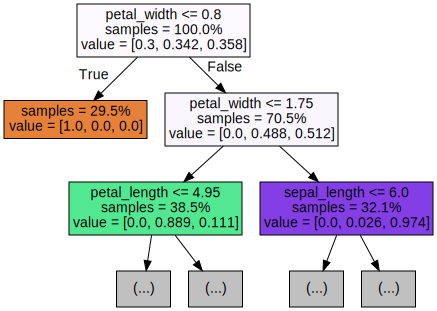

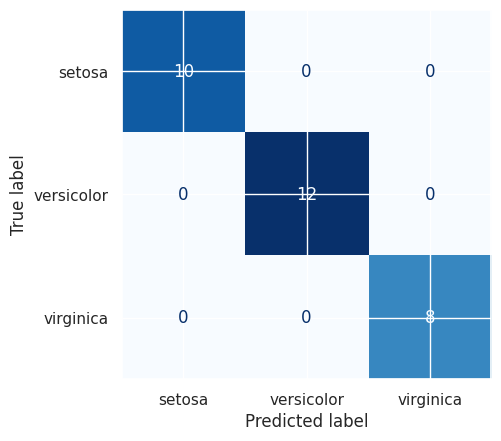

In [ ]:
# Create a RandomForest classifier with 1000 trees
model =  RandomForestClassifier(n_estimators=1000, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display confusion matrix for evaluation
display_labels = ["setosa", "versicolor", "virginica"]
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=display_labels).plot(
    include_values=True, cmap="Blues", colorbar= False)

# Print evaluation metrics for RandomForest
print(f'\nEvaluation metrics:')
print(f'\nAccuracy Score:',accuracy_score(y_test, y_pred))
print(f'\nClassification Report:\n\n',classification_report(y_test, y_pred))

# Display decision trees from the RandomForest
for i in range(5):
    tree = model.estimators_[i]
    data = export_graphviz(tree, feature_names=X_train.columns, filled=True, max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(data)
    display(graph)

**2) LogisticRegression Classification**


Evaluation metrics:

Accuracy Score: 1.0

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



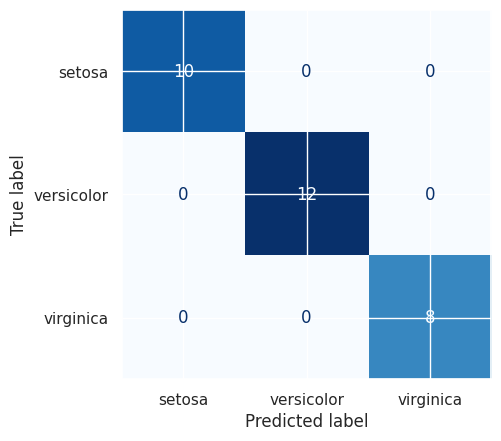

In [ ]:
# Create a Logistic Regression classifier with a large iteration tahn total no of raw in dataset (max_iter=200)
model_LR = LogisticRegression(C=1e5, max_iter=200)

# Train the model on the entire dataset
model_LR.fit(X_train, y_train)

# Make predictions on the test set
y_pred_LR = model_LR.predict(X_test)

# Display confusion matrix for evaluation
display_labels = ["setosa", "versicolor", "virginica"]
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_LR), display_labels=display_labels).plot(
    include_values=True, cmap="Blues", colorbar= False)

# Print evaluation metrics for Logistic Regression
print(f'\nEvaluation metrics:')
print(f'\nAccuracy Score:',accuracy_score(y_test, y_pred_LR))
print(f'\nClassification Report:\n\n',classification_report(y_test, y_pred_LR))

**3) KNN Classification**

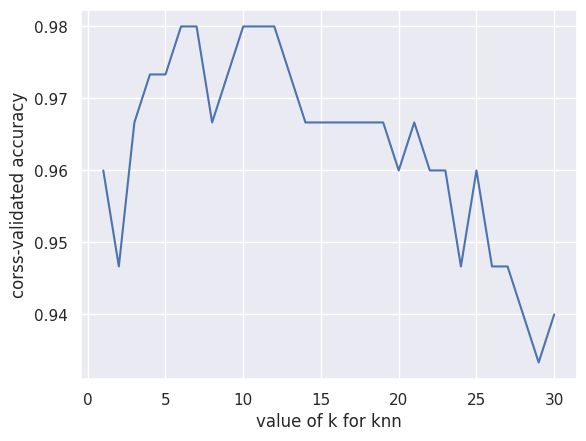


Evaluation metrics:

Accuracy Score: 1.0

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



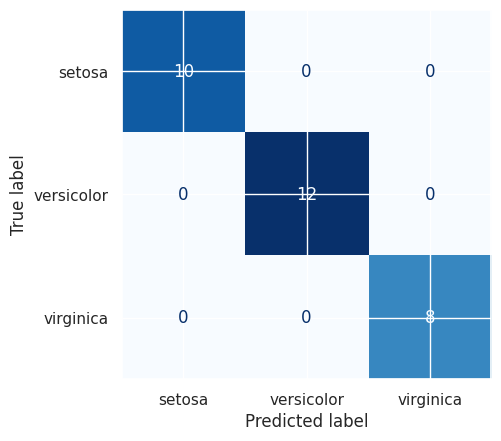

In [ ]:
# Explore different values of k for KNN
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the cross-validated accuracy against the values of k
plt.plot(k_range,k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('corss-validated accuracy')
plt.show()

# Identify the optimal value of k with the maximum accuracy
max_acc = max(k_scores)
k = [i for i, j in enumerate(k_scores) if j == max_acc]
max_k = max(k)

# Create a KNN classifier with the optimal k
model_knn =  KNeighborsClassifier(n_neighbors=max_k)

# Train the model on the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Display confusion matrix for evaluation
display_labels = ["setosa", "versicolor", "virginica"]
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=display_labels).plot(
    include_values=True, cmap="Blues", colorbar= False)

# Print evaluation metrics for KNN
print(f'\nEvaluation metrics:')
print(f'\nAccuracy Score:',accuracy_score(y_test, y_pred_knn))
print(f'\nClassification Report:\n\n',classification_report(y_test, y_pred_knn))